# <font color='red'>Backpropagation</font>


In this assignment, you will implement Backpropagation from scratch. You will then verify the correctness of the your implementation using a "grader" function/cell (provided by us) which will match your implmentation.

The grader fucntion would help you validate the correctness of your code. 

Please submit the final Colab notebook in the classroom ONLY after you have verified your code using the grader function/cell.




## <font color='red'>Loading data </font>

In [1]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


<font color='blue'><b>Check this video for better understanding of the computational graphs and back propagation</font>

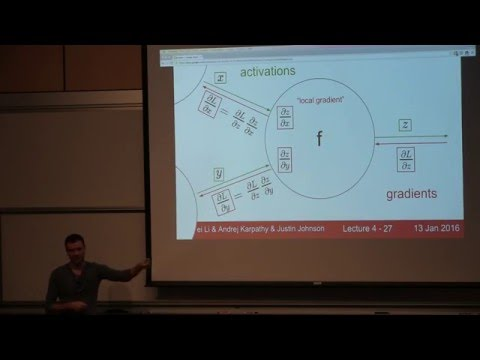

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="1000",height="500")

# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

## <font color='red'>Task 1: Implementing Forward propagation, Backpropagation and Gradient checking </font>

# <font color='red'>Task 1.1 </font>

## <font color='blue'>Forward propagation </font>


*  <b>
    Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

In [3]:
import math
import numpy as np
def sigmoid(z):
    
# we can use this function in forward and backward propagation
# write the code to compute the sigmoid value of z and return that valuen
    return 1/(1+math.exp(-z))

In [4]:
def grader_sigmoid(z):
  #if you have written the code correctly then the grader function will output true
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

In [5]:
def forward_propagation(x, y, w):
    
# X: input data point, note that in this assignment you are having 5-d data points
# y: output varible
# W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
# you have to return the following variables
# exp= part1 (compute the forward propagation until exp and then store the values in exp)
# tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
# sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
# we are computing one of the values for better understanding
    exp = np.exp((((x[0]*w[0])+(x[1]*w[1])) * ((x[0]*w[0])+ (x[1]*w[1]))) + w[5])
    tanh = np.tanh(exp+w[6])
    sig = sigmoid((np.sin(x[2]*w[2]) * ((x[3]*w[3])+(x[4]*w[4]))) + w[7])
    y_bar = sig*w[8] + tanh
    loss = (y-y_bar)**2
    dy_pr = 2*(y_bar-y)
    return {'exp':exp,'tanh':tanh,'sigmoid':sig,'loss':loss,'dy_pr':dy_pr}

In [28]:
def grader_forwardprop(data):
    dl = (data['dy_pr']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

# Grader Function

In [7]:
def grader_sigmoid(z):  
    val=sigmoid(z)
    assert(val==0.8807970779778823)
    return True
grader_sigmoid(2)

True

# Grader Function-2

In [9]:
def grader_forwardprop(data):
    dl = (data['dy_pr']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

# <font color='red'>Task 1.2 </font>

## <font color='blue'>Backward propagation</font>

In [10]:
def backward_propagation(X,W,dict):    
#'''In this function, we will compute the backward propagation '''
# L: the loss we calculated for the current point
# dictionary: the outputs of the forward_propagation() function
# write code to compute the gradients of each weight [w1,w2,w3,...,w9]
# Hint: you can use dict type to store the required variables
# dw1 = # in dw1 compute derivative of L w.r.to w1
# dw2 = # in dw2 compute derivative of L w.r.to w2
# dw3 = # in dw3 compute derivative of L w.r.to w3
# dw4 = # in dw4 compute derivative of L w.r.to w4
# dw5 = # in dw5 compute derivative of L w.r.to w5
# dw6 = # in dw6 compute derivative of L w.r.to w6
# dw7 = # in dw7 compute derivative of L w.r.to w7
# dw8 = # in dw8 compute derivative of L w.r.to w8
# dw9 = # in dw9 compute derivative of L w.r.to w9
    exp = dict['exp']
    tanh = dict['tanh']
    sig = dict['sigmoid']
    loss = dict['loss']
    dy_pr = dict['dy_pr']
    dw1 = dy_pr*(1-np.tanh(exp+W[6])**2)*np.exp(W[5]+(((X[0]*W[0])+(X[1]*W[1]))*((X[0]*W[0])+(X[1]*W[1]))))*((((X[0]*W[0])+
(X[1]*W[1]))*X[0])+(((X[0]*W[0])+(X[1]*W[1]))*X[0]))
    dw2 = dy_pr*(1-np.tanh(exp+W[6])**2)*np.exp(W[5]+(((X[0]*W[0])+(X[1]*W[1]))*((X[0]*W[0])+(X[1]*W[1]))))*((((X[0]*W[0])+
(X[1]*W[1]))*X[1])+(((X[0]*W[0])+(X[1]*W[1]))*X[1]))
    dw3 = dy_pr*W[8]*sigmoid(W[7]+(np.sin(X[2]*W[2])*((X[3]*W[3])+(X[4]*W[4]))))*(1-sigmoid(W[7]+(np.sin(X[2]*W[2])*
((X[3]*W[3])+(X[4]*W[4])))))*((X[3]*W[3])+(X[4]*W[4]))*np.cos(W[2]*X[2])*X[2]
    dw4 = dy_pr*W[8]*sigmoid(W[7]+(np.sin(X[2]*W[2])*((X[3]*W[3])+(X[4]*W[4]))))*(1-sigmoid(W[7]+(np.sin(X[2]*W[2])*
((X[3]*W[3])+(X[4]*W[4])))))*np.sin(X[2]*W[2])*X[3]
    dw5 = dy_pr*W[8]*sigmoid(W[7]+(np.sin(X[2]*W[2])*((X[3]*W[3])+(X[4]*W[4]))))*(1-sigmoid(W[7]+(np.sin(X[2]*W[2])*
((X[3]*W[3])+(X[4]*W[4])))))*np.sin(X[2]*W[2])*X[4]
    dw6 = dy_pr*(1-np.tanh(W[6]+exp)**2)*np.exp(W[5]+(((X[0]*W[0])+(X[1]*W[1]))*((X[0]*W[0])+(X[1]*W[1]))))
    dw7 = dy_pr*(1-np.tanh(exp+W[6])**2)
    dw8 = dy_pr*W[8]*sigmoid(W[7]+(np.sin(X[2]*W[2])*((X[3]*W[3])+(X[4]*W[4]))))*(1-sigmoid(W[7]+(np.sin(X[2]*W[2])*
((X[3]*W[3])+(X[4]*W[4])))))
    dw9 = dy_pr * sig
#store the variables dw1,dw2 etc. in a dict as backward_dict['dw1']= dw1,backward_dict['dw2']= dw2...
# return dW, dW is a dictionary with gradients of all the weights
    return {'dw1':dw1,'dw2':dw2,'dw3':dw3,'dw4':dw4,'dw5':dw5,'dw6':dw6,'dw7':dw7,'dw8':dw8,'dw9':dw9}

In [31]:
def grader_backprop(data):
    
    dw1=(data['dw1']==-0.22973323498702003)
    dw2=(data['dw2']==-0.021407614717752925)
    dw3=(data['dw3']==-0.005625405580266319)
    dw4=(data['dw4']==-0.004657941222712423)
    dw5=(data['dw5']==-0.0010077228498574246)
    dw6=(data['dw6']==-0.6334751873437471)
    dw7=(data['dw7']==-0.561941842854033)
    dw8=(data['dw8']==-0.04806288407316516)
    dw9=(data['dw9']==-1.0181044360187037)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
d1=backward_propagation(X[0],w,d1)
grader_backprop(d1)

True

In [32]:
def grader_backprop(data):
    dw1=(np.round(data['dw1'],6)==-0.229733)
    dw2=(np.round(data['dw2'],6)==-0.021408)
    dw3=(np.round(data['dw3'],6)==-0.005625)
    dw4=(np.round(data['dw4'],6)==-0.004658)
    dw5=(np.round(data['dw5'],6)==-0.001008)
    dw6=(np.round(data['dw6'],6)==-0.633475)
    dw7=(np.round(data['dw7'],6)==-0.561942)
    dw8=(np.round(data['dw8'],6)==-0.048063)
    dw9=(np.round(data['dw9'],6)==-1.018104)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
forward_dict=forward_propagation(X[0],y[0],w)
backward_dict=backward_propagation(X[0],w,forward_dict)
grader_backprop(backward_dict)

True

# <font color='red'>Task 1.3 </font>

 ## <font color='blue'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>
 (Write your code in <font color='blue'> def gradient_checking()</font>)

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
<b>NOTE: you can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not you have bug in your code
</pre></b>

In [12]:
W = np.ones(9)*0.1
e = 0.001
def gradient_checking(data_point, W):
    
# compute the L value using forward_propagation()
# compute the gradients of W using backword_propagation()
    d1=forward_propagation(X[0],y[0],W)
    d2=backward_propagation(X[0],W,d1)
    #we are storing the original gradients for the given datapoints in a list
    approx_gradients = []
    for i in range(len(W)):
        weight = W.copy()
        weight[i] = weight[i]+e
        forw = forward_propagation(X[0],y[0],weight)
        first_loss = forw['loss']
        
    # make sure that the order is correct i.e. first element in the list corresponds to  dw1 ,second element is dw2 etc.
    # you can use reverse function if the values are in reverse order
    #now we have to write code for approx gradients, here you have to make sure that you update only one weight at a time
    #write your code here and append the approximate gradient value for each weight in  approx_gradients_list
        
        weight = W.copy()
        weight[i] = weight[i]-e
        forw = forward_propagation(X[0],y[0],weight)
        second_loss = forw['loss']
        approximate_gradient = (first_loss - second_loss)/(2*e)
# add a small value to weight wi, and then find the values of L with the updated weights
# subtract a small value to weight wi, and then find the values of L with the updated weights
# compute the approximation gradients of weight wi
        approx_gradients.append(approximate_gradient)
# compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with gradient_check formula
    return approx_gradients

In [13]:
approx_gradients = gradient_checking(X[0],W)

In [14]:
approx_gradients

[-0.2297327584170894,
 -0.021407614332225045,
 -0.005625403583953137,
 -0.004657941219121664,
 -0.0010077228498328594,
 -0.6334750907762698,
 -0.5619421966853166,
 -0.048062880140031794,
 -1.0181044360186853]

In [15]:
list(d1.values())

[-0.22973323498702003,
 -0.021407614717752925,
 -0.005625405580266319,
 -0.004657941222712423,
 -0.0010077228498574246,
 -0.6334751873437471,
 -0.561941842854033,
 -0.04806288407316516,
 -1.0181044360187037]

In [34]:
# Euclidean distance normalized by the sum of the norm of the vectors
np.linalg.norm(np.array(list(d1.values())) - np.array(approx_gradients))/( (np.linalg.norm(list(d1.values()))) +
np.linalg.norm(approx_gradients) )

2.235509031122564e-07

In [39]:
def grader_grad_check(value):
    print(value)
    assert(np.all(value <= 10**-3))
    return True 

w=[ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768,
   0.00114524,  0.00684168,  0.02242521,  0.01296444]

eps=10**-7
value= gradient_checking(X[0],w)
grader_grad_check(value)

[-0.011663033554154545, -0.001086817516426919, 3.552009464335981e-06, -1.149056483296107e-05, -2.4859275749022913e-06, -0.903275579098084, -0.9022197446691971, -0.007047590417363914, -1.0995465311666175]


TypeError: '<=' not supported between instances of 'list' and 'float'

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 2  optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* The weights have been initialized from normal distribution with mean=0 and std=0.01. The initialization of weights is very important otherwiswe you can face vanishing gradient and exploding gradients problem.

**Check below video for reference purpose**

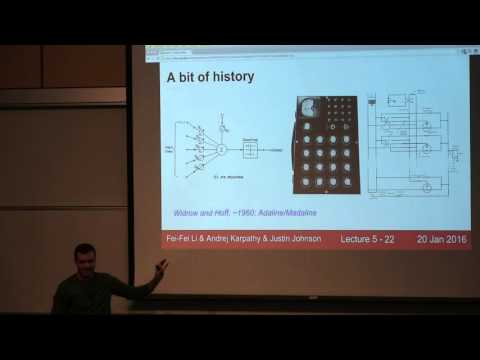

In [36]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-20):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  
</pre>

## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights<br><br>


**Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False .Recheck your logic for that variable .**

### <font color='blue'>2.1 Algorithm with Vanilla update of weights</font>

In [18]:
w = np.random.normal(loc = 0.0,scale= 0.01,size=9)
epochs = 100
lr = 0.001
gradient_losses = []
v1 = []
dw = []
gamma = 0
for i in range(epochs):
    for j in range(len(X)):
        if len(dw) == 0:
            d1 = forward_propagation(X[j],y[j],w)
            d1 = backward_propagation(X[j],w,d1)
            for k in d1.values():
                dw.append(k)
        else:
            d1 = forward_propagation(X[j],y[j],w)
            d1 = backward_propagation(X[j],w,d1)
            for i in range(len(d1.values())):
                dw[i] = list(d1.values())[i]
                
        for l in range(len(dw)):
            w[l] = w[l] - lr*dw[l]
            
    l1 = forward_propagation(X[0],y[0],w)
    loss = l1['loss']
    gradient_losses.append(loss)

Text(0.5, 1.0, 'vanilla Update')

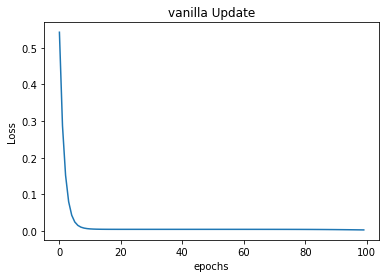

In [19]:
plt.plot(range(epochs),gradient_losses)
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.title('vanilla Update')


In [37]:
#as we see we have Plotted the plot with loss epochs.
#aw we observe the loss is getting rapidly decreasing as the epoch increases

### <font color='blue'>2.2 Algorithm with Momentum update of weights</font>

<img src='https://i.imgur.com/gyPSXhS.png'>

Here Gamma referes to the momentum coefficient, eta is leaning rate and v_t is moving average of our gradients at timestep t

In [20]:
w = np.random.normal(loc = 0.0,scale= 0.01,size=9)
epochs = 100
lr = 0.001
momentum_losses = []
v1 = []
dw = []
gamma = 0.95
for i in range(epochs):
    for j in range(len(X)):
        d1 = forward_propagation(X[j],y[j],w)
        data = backward_propagation(X[j],w,d1)
        if len(dw) == 0:
            for k in data.values():
                dw.append(k)
        if len(v1) == 0:
            for l in data.values():
                v1.append(l)
            for m in range(len(w)):
                w[m] = w[m] - lr*dw[m]
        else:
            d1 = forward_propagation(X[j],y[j],w)
            data = backward_propagation(X[j],w,d1)
            for k in range(len(data.values())):
                dw[k] = list(data.values())[k]
            for n in range(len(v1)):
                v1[n] = (gamma**j)*v1[n] - lr*dw[n]
            for o in range(len(w)):
                w[o] = w[o] + v1[o]
    d1 = forward_propagation(X[0],y[0],w)
    loss = d1['loss']
    momentum_losses.append(loss)

# Plot between epochs and loss


Text(0.5, 1.0, 'momentum Update')

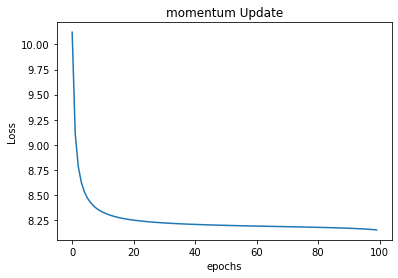

In [22]:
plt.plot(range(epochs),momentum_losses)
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.title('momentum Update')

In [ ]:
#compared to this vanilla update of weights has more loss redumption w.t.to epochs

### <font color='blue'>2.3 Algorithm with Adam update of weights</font>

<img src='https://i.imgur.com/GDR8UFP.jpg'>

In [23]:
import mpmath
w = np.random.normal(loc = 0.0,scale= 0.01,size=9)
epochs = 100
alpha = 0.001
adam_losses = []
vt = []
mt = []
mcapt = []
vcapt = []
dw = []
beta1 = 0.9
beta2 = 0.99
epsilon = 0.0001
for i in range(epochs):
    for j in range(len(X)):
        d1 = forward_propagation(X[j],y[j],w)
        data = backward_propagation(X[j],w,d1)
        if len(dw) == 0:
            for k in data.values():
                dw.append(k)
            for k in range(len(w)):
                mt.append((1-beta1)*dw[k])
            for k in range(len(w)):
                vt.append((1-beta2)*(dw[k])**2)
            #for k in range(len(w)):
            #mcapt.append(mt[k]/(1 - beta1))
            #for k in range(len(w)):
            #vcapt.append(vt[k]/(1-beta2))
            for k in range(len(w)):
                w[k] = w[k] -((alpha*mt[k])/(np.sqrt(vt[k]) + epsilon))
        else:
            #d1 = forward_propagation(X[j],y[j],w)
            #data = backward_propagation(X[j],w,d1)
            for k in range(len(data.values())):
                dw[k] = list(data.values())[k]
            for k in range(len(mt)):
                mt[k] = beta1*mt[k] + (1-beta1)*dw[k]
            for k in range(len(vt)):
                vt[k] = beta2*vt[k] + (1-beta2)*(dw[k])**2
            #for k in range(len(mcapt)):
            #mcapt[k] = mt[k]/(1-beta1**j)
            #for k in range(len(vcapt)):
            #vcapt[k] = vt[k]/(1-beta2**j)
            for k in range(len(mt)):
                w[k] = w[k] -((alpha*mt[k])/(mpmath.sqrt(vt[k]) + epsilon))
                #w[k] += -alpha*mcapt[k] / ( mpmath.sqrt(vcapt[k]) + epsilon )
    d1 = forward_propagation(X[j],y[j],w)
    loss = d1['loss']
    adam_losses.append(loss)

Text(0.5, 1.0, 'Adam Update')

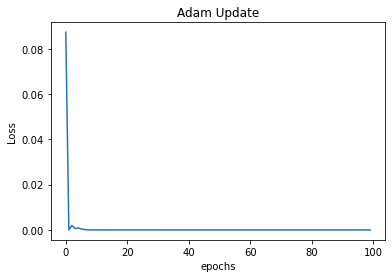

In [24]:
plt.plot(range(epochs),adam_losses)
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.title('Adam Update')

In [ ]:
#compared to vanilla and Momentum update of weights Adam is much more better as its loss is decreased 

<font color='blue'>Comparision plot between epochs and loss with different optimizers. Make sure that loss is conerging with increaing epochs</font>

In [26]:
#plot the graph between loss vs epochs for all 3 optimizers.

[]

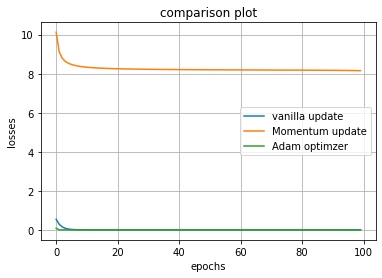

In [27]:
plt.plot(range(epochs),gradient_losses, label = 'vanilla update')
plt.plot(range(epochs),momentum_losses, label = 'Momentum update')
plt.plot(range(epochs),adam_losses,label = 'Adam optimzer')
plt.xlabel('epochs')
plt.ylabel('losses')
plt.title('comparison plot')
plt.legend()
plt.grid()
plt.plot()

In [ ]:
#compared all the 3 optimizers and plotted those comparative results 

<font color='blue'><b>You can go through the following blog to understand the implementation of other optimizers .</font>
   <br> [Gradients update blog](https://cs231n.github.io/neural-networks-3/) </br>